In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv(r'D:\Data Science\Data Science\Data Trained\Assignments and Projects\Projects\train_ctrUa4K.csv')

In [3]:
test=pd.read_csv(r'D:\Data Science\Data Science\Data Trained\Assignments and Projects\Projects\test_lAUu6dG.csv')

In [4]:
train_original=train.copy()

In [5]:
test_original=test.copy()

In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [8]:
#From above, we can see thta test data does not have 'response variable' i.e. Loan Status. 

In [9]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
train.shape

(614, 13)

In [11]:
test.shape

(367, 12)

In [12]:
#Performing Uniovariate Analysis

In [13]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [14]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

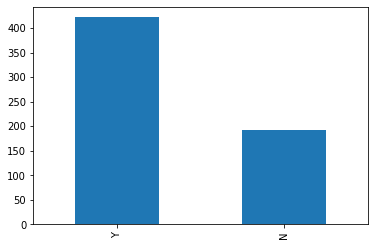

In [15]:
train['Loan_Status'].value_counts().plot.bar()

In [16]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
#From the dataset, we found that there are3 types of data types:
#1.Categorical: gender, married, self employed, credit_history, loan_status
#2.Ordinal:dependents, education, property_area
#3.Numerical:Applicant Income, Coapplicant income, loan_amount, loan_amount_term

In [18]:
df=train.dropna()

In [19]:
#First we will do univaroiate anlaysis on indpendent-categorical variables

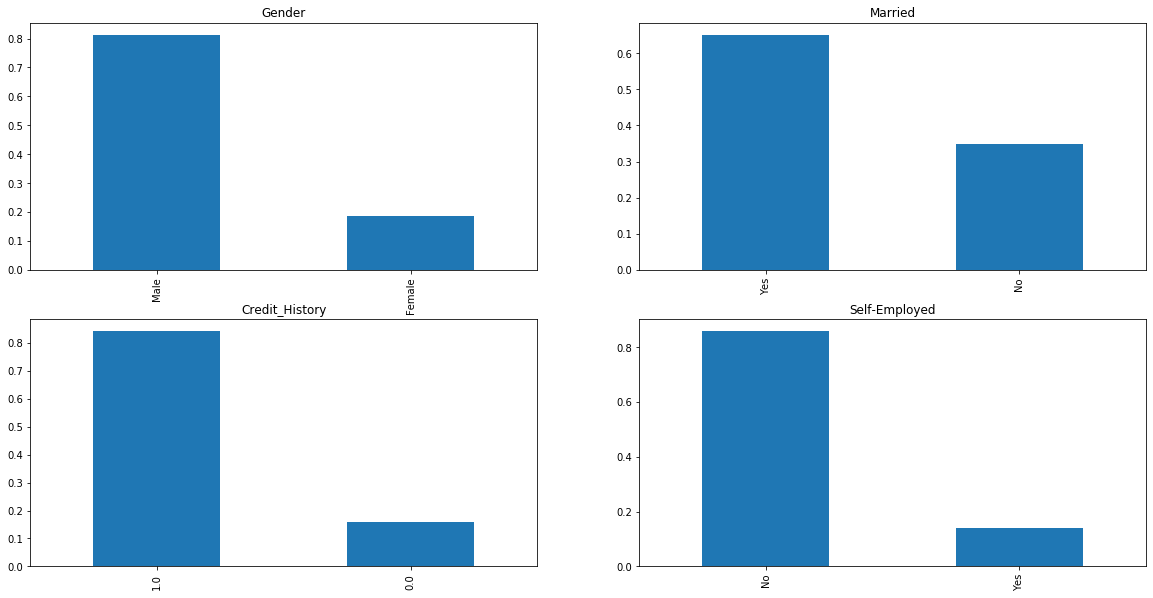

In [20]:
plt.figure()
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.subplot(224)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self-Employed')
plt.show()

In [21]:
#Hypothesis from above plots
#1.80% of the applicants are males.
#2.65% of applicants are self-employed
#3.85% of applicants repayed their previous debts
#4.Around 15% of applicants are self-employed.

In [22]:
#Independent Variable-Ordinal

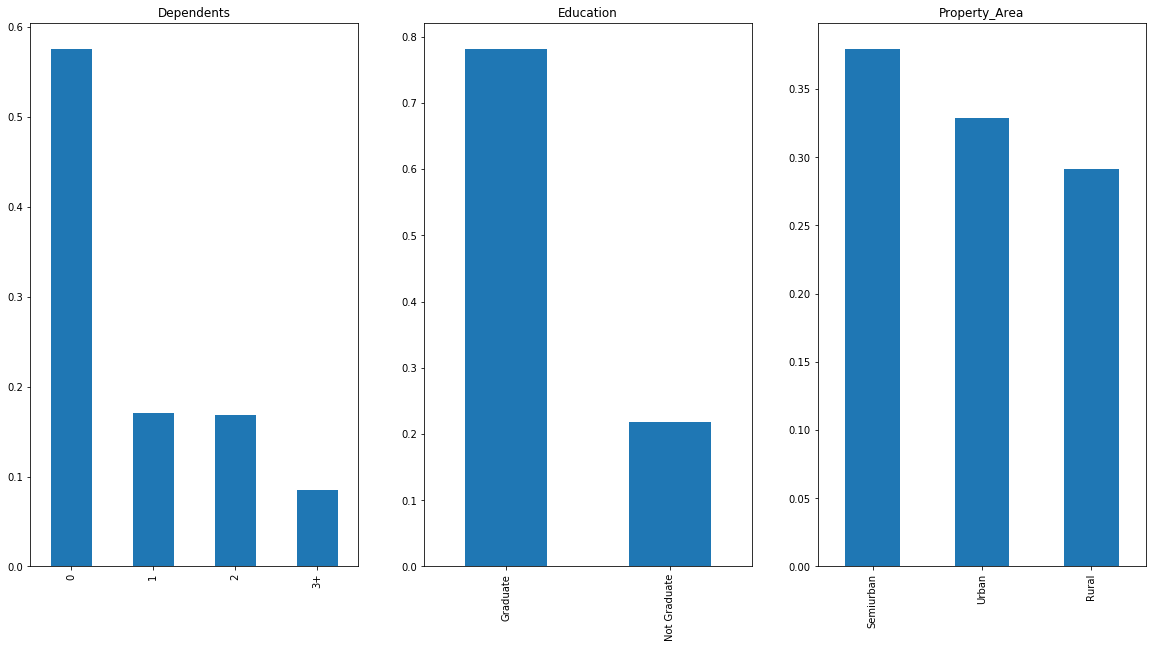

In [23]:
plt.figure()
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()


In [24]:
#From the above , 
#1.Most of the applicants do not have dependents
#2.Around 80 % applicants are graduates 
#2.Most applicants are from semi urban area.

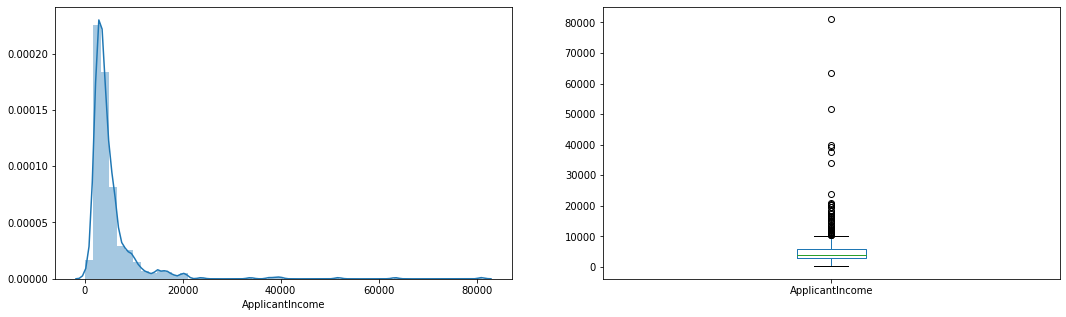

In [25]:
#Independent Numerical
plt.figure()
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(18, 5))
plt.show()

In [26]:
#From dist plot,we can see most of the data in the distribution of applicant income is towards left which means it is not normally distributed.


Text(0.5, 0.98, ' ')

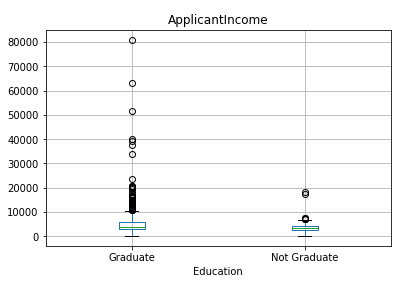

In [27]:
#The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle(" ")



In [28]:
#We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

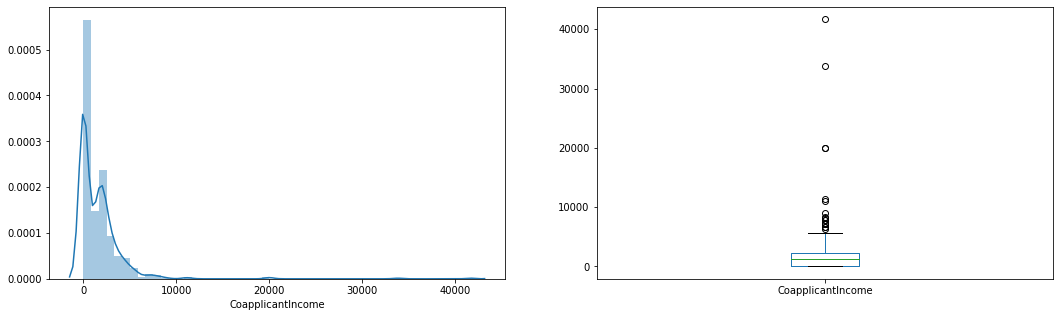

In [29]:
#Coapplicant income distribution.
plt.figure()
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(18,5))
plt.show()

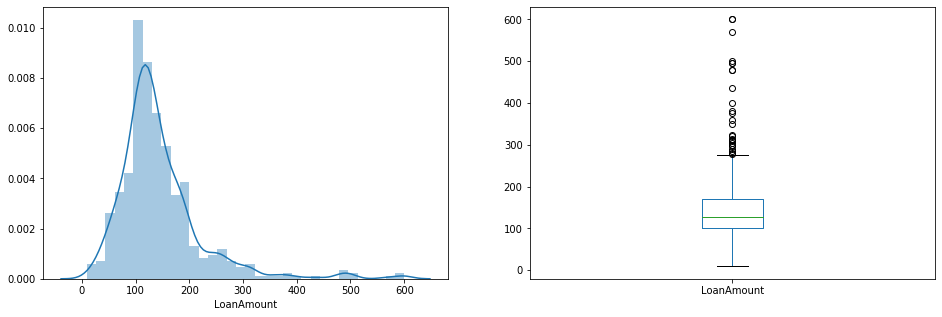

In [30]:
plt.figure()
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount'])
plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

In [31]:
#We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

In [32]:
#Bivariate Analysis

In [33]:
#Lets recall some of the hypotheses that we generated earlier:

#Applicants with high income should have more chances of loan approval.
#Applicants who have repaid their previous debts should have higher chances of loan approval.
#Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
#Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

In [34]:
#Lets try to test the above mentioned hypotheses using bivariate analysis

In [35]:
#Categorical Independent Variable vs Target Variable

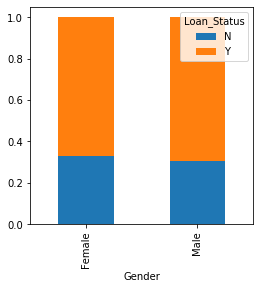

In [36]:
x=pd.crosstab(train['Gender'], train['Loan_Status'])
x.div(x.sum(1).astype(float), axis=0).plot(kind='bar', stacked='True',figsize=(4,4))


In [37]:
# From above, we cans ee that proportion of loan approval and dis approvals are sam efor both males and females

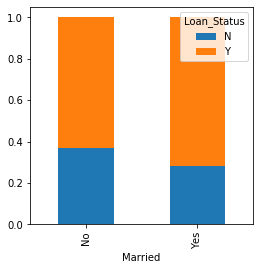

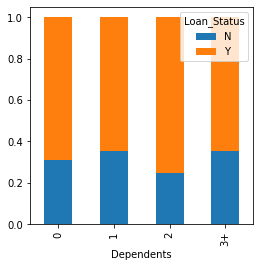

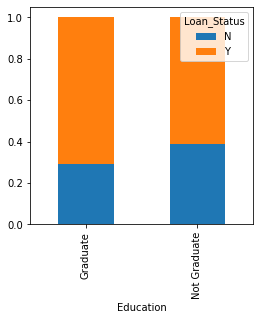

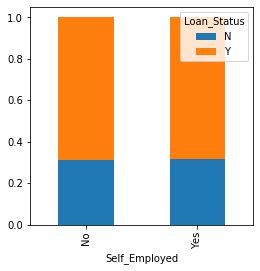

In [38]:


Married=pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

Dependents=pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

Education=pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

Self_Employed=pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

In [39]:
#Categorical Independent Variable vs Target Variable

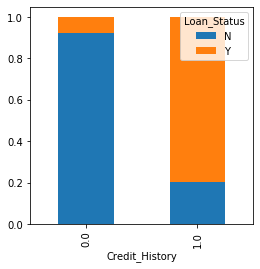

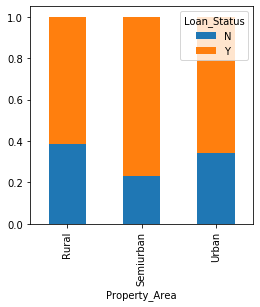

In [40]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

In [41]:
#It seems people with credit history as 1 are more likely to get their loans approved.
#Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

In [42]:
#Numerical Independent Variable vs Target Variable

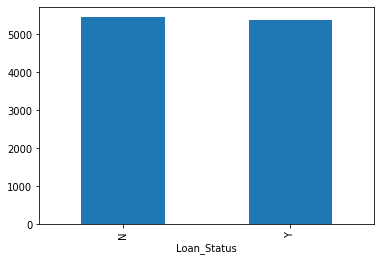

In [43]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [44]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

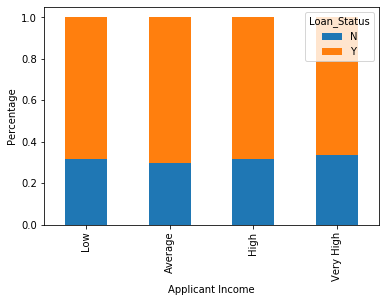

In [45]:
train['Income_bin']=pd.cut(train['ApplicantIncome'], bins=[0, 2500, 4000, 6000, 81000], labels=['Low', 'Average', 'High', 'Very High'])
Income_bin=pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Applicant Income')
plt.ylabel('Percentage')
plt.show()

In [46]:
#From the above figure, Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

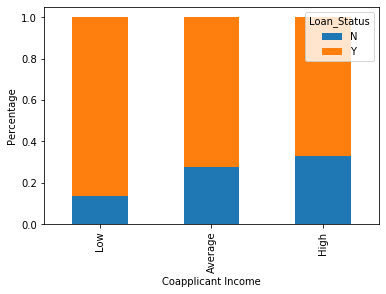

In [47]:
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'], bins=[0, 1000,3000, 42000], labels=['Low', 'Average', 'High'])
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Coapplicant Income')
plt.ylabel('Percentage')
plt.show()

In [48]:
#It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

In [49]:
#Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

In [50]:
train['TotalIncome']=train['ApplicantIncome']+train['CoapplicantIncome']

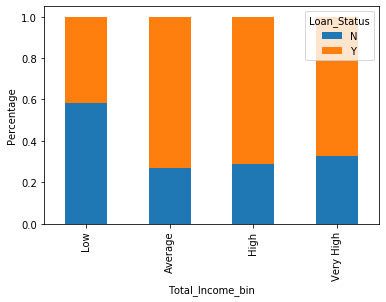

In [51]:
train['Total_Income_bin']=pd.cut(train['TotalIncome'], bins=[0, 2500, 4000, 6000, 81000], labels=['Low', 'Average', 'High', 'Very High'])
Total_Income_bin=pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked='True')
plt.xlabel('Total_Income_bin')
plt.ylabel('Percentage')
plt.show()


In [52]:
#We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

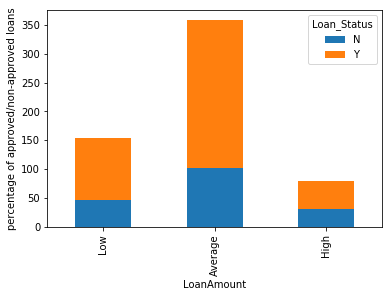

In [53]:
train['LoanAmount_bin']=pd.cut(train['LoanAmount'], bins=[0, 100, 200, 700],labels=['Low','Average', 'High'])
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'], train['Loan_Status']).plot(kind='bar', stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('percentage of approved/non-approved loans')
plt.show()

In [54]:
#Lets drop all bins we created for exploratory analysis

In [57]:
train=train.drop(['Total_Income_bin', 'Coapplicant_Income_bin',  'Income_bin', 'LoanAmount_bin','TotalIncome'], axis=1)

In [58]:
train['Dependents']

0        0
1        1
2        0
3        0
4        0
5        2
6        0
7       3+
8        2
9        1
10       2
11       2
12       2
13       0
14       2
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       0
23       2
24       1
25       0
26       0
27       2
28       0
29       2
      ... 
584      1
585      1
586      0
587      0
588      0
589      2
590      0
591      2
592     3+
593      0
594      0
595      0
596      2
597    NaN
598      0
599      2
600     3+
601      0
602     3+
603      0
604      1
605      0
606      1
607      2
608      0
609      0
610     3+
611      1
612      2
613      0
Name: Dependents, Length: 614, dtype: object

In [59]:
train['Dependents'].replace('3+', 3, inplace=True)

In [60]:
train['Loan_Status'].replace('N', 0, inplace=True)


In [61]:
train['Loan_Status'].replace('Y', 1, inplace=True)

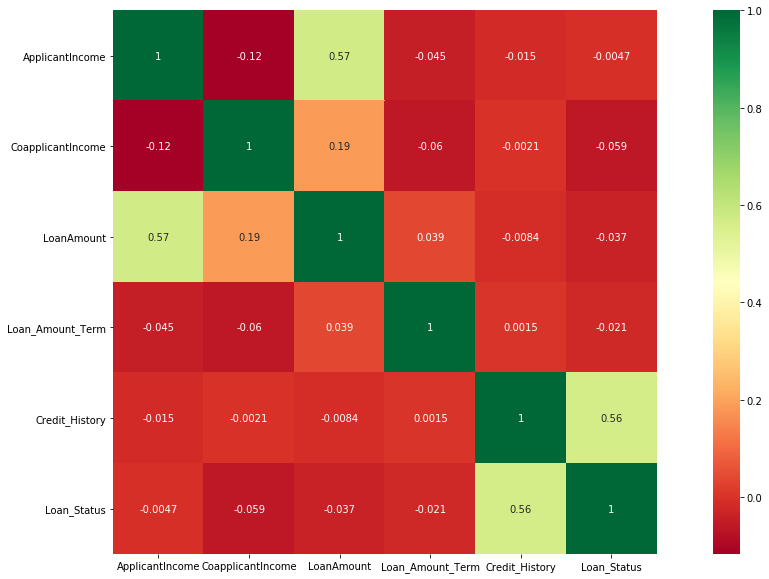

In [62]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),square=True,cmap='RdYlGn', annot=True)
plt.show()

In [63]:
#rom above heat map, we can see that ApplicantIncome - LoanAmount and Credit_History - Loan_Status are correlated.

In [64]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [68]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

In [69]:
train['Married'].fillna(train['Married'].mode()[0], inplace=True)

In [71]:
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

In [73]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

In [75]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [76]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [79]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [80]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)

In [81]:
test['Married'].fillna(test['Married'].mode()[0], inplace=True)

In [82]:
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)

In [83]:
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)

In [84]:
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

In [85]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)

In [86]:
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [87]:
test['Married']

0      Yes
1      Yes
2      Yes
3      Yes
4       No
5      Yes
6       No
7      Yes
8      Yes
9       No
10      No
11     Yes
12      No
13     Yes
14      No
15      No
16     Yes
17     Yes
18     Yes
19      No
20     Yes
21      No
22      No
23      No
24     Yes
25      No
26     Yes
27     Yes
28     Yes
29      No
      ... 
337    Yes
338    Yes
339     No
340    Yes
341     No
342    Yes
343    Yes
344     No
345    Yes
346    Yes
347     No
348    Yes
349    Yes
350    Yes
351     No
352    Yes
353    Yes
354    Yes
355    Yes
356    Yes
357     No
358    Yes
359     No
360    Yes
361    Yes
362    Yes
363    Yes
364     No
365    Yes
366     No
Name: Married, Length: 367, dtype: object

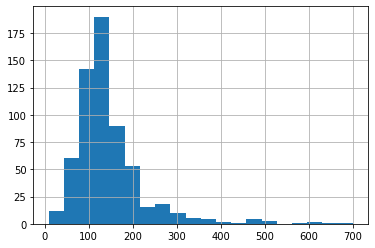

In [93]:
train['LoanAmount'].hist(bins=20)

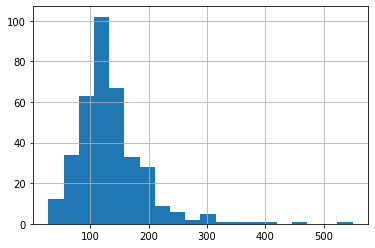

In [94]:
test['LoanAmount'].hist(bins=20)

In [88]:
train['LoanAmount_log']=np.log(train['LoanAmount'])

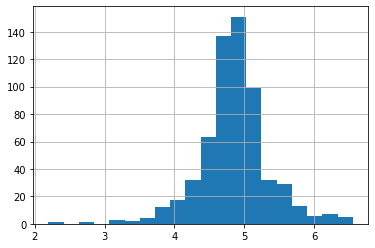

In [89]:
train['LoanAmount_log'].hist(bins=20)

In [90]:
test['LoanAmount_log']=np.log(test['LoanAmount'])

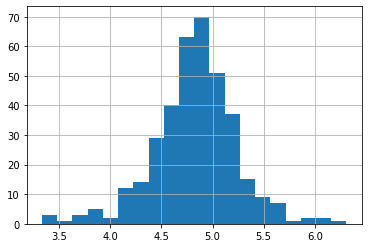

In [91]:
test['LoanAmount_log'].hist(bins=20)

In [95]:
train=train.drop('Loan_ID',axis=1) 

In [96]:
test=test.drop('Loan_ID', axis=1)

In [98]:
X=train.drop('Loan_Status', axis=1)

In [99]:
y=train['Loan_Status']

In [101]:
type(X)

pandas.core.frame.DataFrame

In [102]:
type(y)

pandas.core.series.Series

In [103]:
X=pd.get_dummies(X)

In [104]:
y=pd.get_dummies(y)

In [105]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


In [131]:
y.drop(1, axis=1, inplace=True)

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.3)

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
log_r=LogisticRegression()

In [136]:
X_train.values

array([[2.383e+03, 3.334e+03, 1.720e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [5.000e+03, 2.541e+03, 1.510e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [4.166e+03, 0.000e+00, 9.800e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [3.620e+03, 0.000e+00, 2.500e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [5.516e+03, 1.130e+04, 4.950e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [7.740e+03, 0.000e+00, 1.280e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [137]:
y_train.values

array([[0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [138]:
X_train.shape

(429, 21)

In [139]:
y_train.shape

(429, 1)

In [140]:
log_r.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
y_pred=log_r.predict(X_test)

In [143]:
from sklearn.metrics import accuracy_score

In [144]:
accuracy_score(y_test, y_pred)

0.8162162162162162

In [148]:
test=pd.get_dummies(test)

In [151]:
testsub_pred=log_r.predict(test)

In [152]:
testsub_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,